**DATA SET FEATURES INFO**

1. **title** - Name of the product

2. **Rating**- average rating given to a product

3. **maincateg** - category that the product is listed under(men/women)

4. **platform** - platform on which it is sold on (Eg. Amazon, Flipkart)

5. **price1** - Discounted Price of the listed product    **[TARGET VARIABLE]**

6. **actprice1** - Actual price of the listed product

7. **Offer %** - Discount percent

8. **norating1** - number of ratings available for a particular product

9. **noreviews1** - number of reviews available for a particular product

10. **star_5f** - number of five star ratings given to a particular product

11. **star_4f** - number of four star ratings given to a particular product

12. **star_3f** - number of three star ratings given to a particular product

13. **star_2f** - number of two star ratings given to a particular product

14. **star_1f** - number of one star ratings given to a particular product

15. **fulfilled1**- whether it is Amazon fulfilled or not

## EDA

In [1]:
#importing important libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("train.csv") #reading and displaying first 5 rows of the dataset 
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [4]:
df.shape #data shape

(15730, 16)

In [5]:
df.platform.value_counts()  #checking for different values in platforms

Flipkart    15389
Amazon        341
Name: platform, dtype: int64

In [6]:
df.drop(columns = ["title","id"],axis=1,inplace = True) #dropping columns as they won't play imp role.

In [8]:
df.drop_duplicates() #dropping duplicates
df.describe()  #more description about data

,Rating,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
count,15730.000000,15730.000000,15730.000000,15052.000000,15152.000000,15142.000000,15191.000000,15499.000000,15730.000000,15730.000000,15730.000000
mean,4.012873,688.070693,1369.286777,3057.660776,423.976307,1585.239466,655.923310,357.260662,155.085188,275.500572,0.601526
std,0.298440,649.409586,1240.900227,11846.965689,1768.230384,6177.476241,2855.735531,1402.246610,558.650254,958.589075,0.489600
min,0.000000,69.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.900000,349.000000,699.000000,63.000000,9.000000,30.000000,12.000000,7.000000,3.000000,6.000000,0.000000
50%,4.000000,474.000000,999.000000,308.000000,44.000000,150.000000,60.000000,34.000000,17.000000,30.000000,1.000000
75%,4.200000,699.000000,1299.000000,1526.000000,215.000000,788.000000,300.000000,172.000000,77.000000,140.000000,1.000000
max,5.000000,5998.000000,13499.000000,289973.000000,45448.000000,151193.000000,74037.000000,34978.000000,11705.000000,18060.000000,1.000000


In [9]:
df.info() #checking for dataypes and non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15730 entries, 0 to 15729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rating      15730 non-null  float64
 1   maincateg   15204 non-null  object 
 2   platform    15730 non-null  object 
 3   price1      15730 non-null  int64  
 4   actprice1   15730 non-null  int64  
 5   Offer %     15730 non-null  object 
 6   norating1   15052 non-null  float64
 7   noreviews1  15152 non-null  float64
 8   star_5f     15142 non-null  float64
 9   star_4f     15191 non-null  float64
 10  star_3f     15499 non-null  float64
 11  star_2f     15730 non-null  int64  
 12  star_1f     15730 non-null  int64  
 13  fulfilled1  15730 non-null  int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 1.7+ MB


In [10]:
df.drop("Offer %",axis=1,inplace=True)  #dropping this column as it's information is contained in price1

In [11]:
df = pd.get_dummies(df, drop_first = True )  #converting categorical columns into numerical 

In [12]:
df.rename(columns = {"fulfilled1": "Amazon_fulfilled"})  #for better understanding about the column

,Rating,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,Amazon_fulfilled,maincateg_Women,platform_Flipkart
0,3.9,698,999,38.0,7.0,17.0,9.0,6.0,3,3,0,1,1
1,3.8,999,1999,531.0,69.0,264.0,92.0,73.0,29,73,1,0,1
2,4.4,2749,4999,17.0,4.0,11.0,3.0,2.0,1,0,1,1,1
3,4.2,518,724,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1,0,1
4,3.9,1379,2299,77.0,3.0,35.0,21.0,7.0,7,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15725,4.3,567,1199,807.0,114.0,485.0,177.0,61.0,41,43,0,1,1
15726,3.9,499,998,246.0,34.0,120.0,45.0,37.0,16,28,1,1,1
15727,3.7,329,499,NaN,18.0,NaN,NaN,20.0,10,15,1,1,1
15728,3.9,2249,4499,750.0,479.0,13.0,6.0,10.0,25,47,1,0,0


In [13]:
df.isna().sum()   #checking for null values

Rating                 0
price1                 0
actprice1              0
norating1            678
noreviews1           578
star_5f              588
star_4f              539
star_3f              231
star_2f                0
star_1f                0
fulfilled1             0
maincateg_Women        0
platform_Flipkart      0
dtype: int64

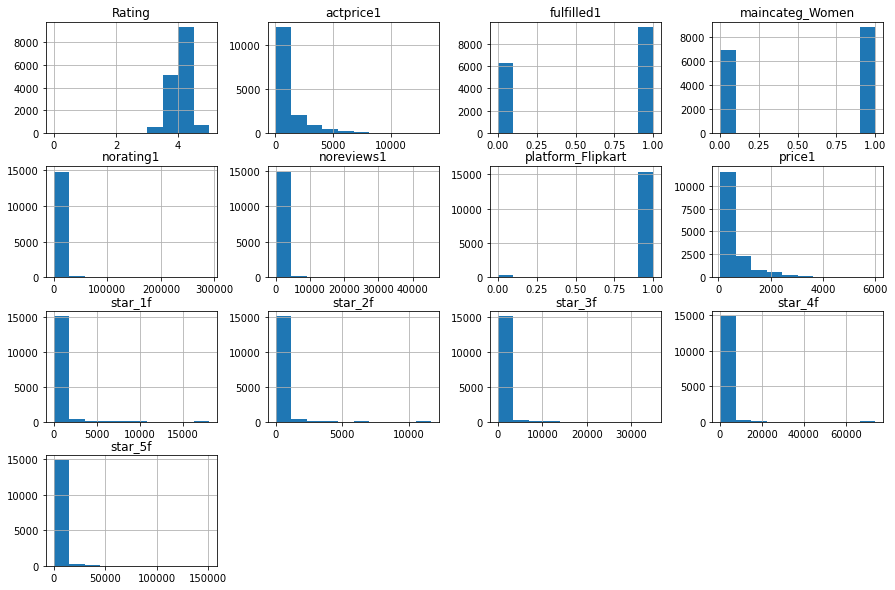

In [14]:
df.hist(figsize=(15,10)); #checking distributions of features
#observation : outliers are present

In [15]:
#imputing the null values with median not with mean due to outliers
df.fillna(df.median().round(decimals=2),inplace=True) 

<AxesSubplot:>

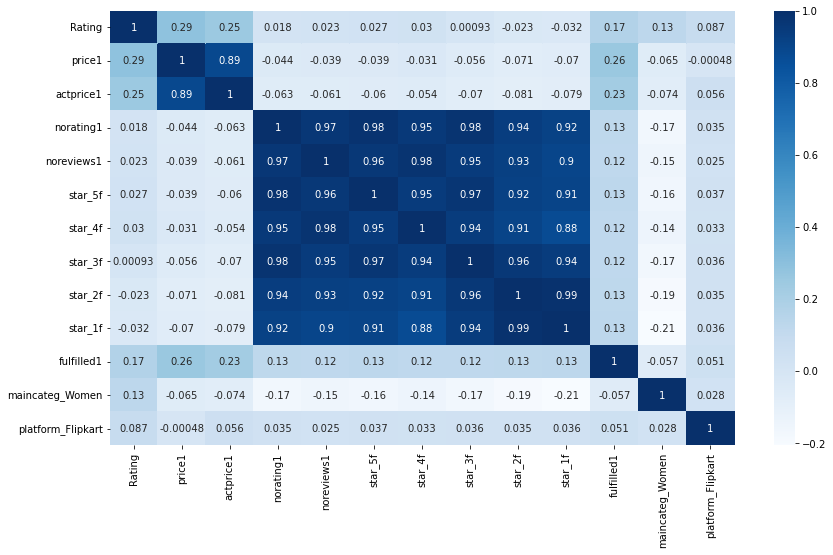

In [16]:
#plotting heatmap to see correlation between data
fig, ax = plt.subplots(figsize=(14,8))  
sns.heatmap(df.corr(), cmap="Blues",annot=True)

In [17]:
#dropping columns as information of norating1, noreviews1 are contained in number of star ratings
df.drop(columns = ["norating1", "noreviews1"],inplace = True)

## MODEL BUILDING

In [18]:
#separating dependent and independent features
X = df.drop(columns = "price1", axis=1)
y = df["price1"]

In [19]:
#splitting dataset into train and test
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2022)

## Linear Regression : Ridge and Lasso

In [22]:
#importing Linear Regression, Ridge and Lasso
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
lr = LinearRegression()           
lr.fit(X_train,y_train)           
y_lr_pred = lr.predict(X_test)  
print("RMSE for linear regression",np.sqrt(mean_squared_error(y_test,y_lr_pred)))

RMSE for linear regression 308.15087071187395


### Lasso

In [36]:
##Using GridSearchCV to find best parameters
lasso = Lasso()
lasso_reg = GridSearchCV(lasso,param_grid = params,scoring = "neg_mean_squared_error",cv=5 )
lasso_reg.fit(X,y) 
print(lasso_reg.best_params_)   #printing out the best parameter

{'alpha': 0.001}


In [35]:
lasso_final = Lasso(alpha=00.1)
lasso_final.fit(X_train,y_train) 
y_lasso_pred = lasso_final.predict(X_test)  
print("RMSE value for Ridge Regression :", np.sqrt(mean_squared_error(y_test,y_lasso_pred)))   

RMSE value for Lasso Regression : 308.1666937894207


## Random Forest

In [37]:
#importing random forest regressor
from sklearn.ensemble import RandomForestRegressor
random_grid = {'max_depth': [10, 15, 20, 30, 35,40],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}
# Use the random grid to search for best hyperparameters
# Creating the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(scoring="neg_mean_squared_error",estimator = rf,
                               param_distributions = random_grid, n_iter = 100, cv = 3,  random_state=2022)
# Fit the random search model
rf_random.fit(X, y)
print(rf_random.best_score_)

-42737.62819221807


In [39]:
print("RMSE value for Random Forest",np.sqrt(-(rf_random.best_score_)))

RMSE value for Random Forest 206.73081094074504


In [42]:
rf_random.best_params_

{'n_estimators': 230,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

### Selecting and Fitting train data

In [43]:
rf_final = RandomForestRegressor(n_estimators= 230,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features = "sqrt",
 max_depth =  30, random_state=2022)
rf_final.fit(X,y)  

RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=230,
                      random_state=2022)

## Test Data

In [44]:
df_test = pd.read_csv("test.csv")  #reading the test data 
df_test.head()

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [45]:
df_test.shape 

(5244, 14)

In [46]:
df.columns  #offer % column is not there

Index(['Rating', 'price1', 'actprice1', 'star_5f', 'star_4f', 'star_3f',
       'star_2f', 'star_1f', 'fulfilled1', 'maincateg_Women',
       'platform_Flipkart'],
      dtype='object')

In [47]:
df_test.drop("title",axis=1,inplace=True) #dropping the columns that are not imp

In [48]:
df_test.drop_duplicates() #dropping duplicates
df_test.describe()        #more info on test data

,id,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
count,5244.000000,5041.000000,5244.000000,5244.000000,5244.000000,5176.000000,5244.000000,5244.000000,5244.000000,5058.000000,5244.000000
mean,10507.372616,4.011089,1378.657895,2988.580092,415.491037,1557.443199,639.785469,356.356789,154.139969,270.397786,0.604500
std,5978.658892,0.301915,1280.630070,12881.253715,1910.726669,6583.766998,2991.065223,1632.732834,611.006799,1035.085288,0.489004
min,0.000000,0.000000,139.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5286.750000,3.900000,699.000000,66.000000,9.000000,32.000000,12.000000,7.000000,3.000000,6.000000,0.000000
50%,10561.500000,4.000000,999.000000,307.000000,44.000000,156.000000,61.000000,34.000000,16.000000,29.000000,1.000000
75%,15636.750000,4.200000,1299.000000,1428.000000,214.250000,764.250000,310.250000,166.000000,75.000000,131.000000,1.000000
max,20964.000000,5.000000,15999.000000,289973.000000,45448.000000,151193.000000,74037.000000,49924.000000,12629.000000,23139.000000,1.000000


In [49]:
df_test.info()    #info on test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5244 entries, 0 to 5243
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5244 non-null   int64  
 1   Rating      5041 non-null   float64
 2   maincateg   5177 non-null   object 
 3   platform    5244 non-null   object 
 4   actprice1   5244 non-null   int64  
 5   norating1   5244 non-null   int64  
 6   noreviews1  5244 non-null   int64  
 7   star_5f     5176 non-null   float64
 8   star_4f     5244 non-null   int64  
 9   star_3f     5244 non-null   int64  
 10  star_2f     5244 non-null   int64  
 11  star_1f     5058 non-null   float64
 12  fulfilled1  5244 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 532.7+ KB


In [50]:
df_test = pd.get_dummies(df_test, drop_first = True )  #converting categorical features     

In [51]:
df_test.isna().sum()   #checking for null values

id                     0
Rating               203
actprice1              0
norating1              0
noreviews1             0
star_5f               68
star_4f                0
star_3f                0
star_2f                0
star_1f              186
fulfilled1             0
maincateg_Women        0
platform_Flipkart      0
dtype: int64

In [52]:
df_test.fillna(df.median().round(decimals=2),inplace=True)  #imputing null values with median
df_test_id = df_test["id"]                                  #storing id column

In [53]:
#dropping columns whose info is contained in other columns
df_test.drop(columns = ["norating1","noreviews1","id"],axis=1,inplace=True) 

In [55]:
y_pred = rf_final.predict(df_test)       #predicting values on the best model obtained above

In [56]:
price1 = pd.Series(y_pred)                    

In [57]:
price1 #predicted price obtained form the model

0        426.116115
1        290.567505
2        490.196688
3       1169.582609
4        401.445528
           ...     
5239     394.137754
5240     639.134905
5241     388.467845
5242     192.295652
5243     714.391304
Length: 5244, dtype: float64

In [58]:
#concatenating id and price1 columns for final output csv file
final_pred = pd.concat([df_test_id,price1.round(decimals=2)],axis=1,keys=["id","price1"])
final_pred.head()

,id,price1
0,2242,426.12
1,20532,290.57
2,10648,490.20
3,20677,1169.58
4,12593,401.45


In [59]:
final_pred.set_index("id",inplace=True) #setting id as index
final_pred.to_csv("predictions2.csv")   #converting the predictions in csv format